# Name: Yeluguri Sai Santhoshi                                                                       
# Task1:    Prediction of Supervised Learning(Linear Regression)

In [49]:
#importing all libraries which are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
#Reading Data from the given link
url = "http://bit.ly/w-data"
data=pd.read_csv(url)

In [51]:
data.shape

(25, 2)

In [52]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [53]:
#First five rows of imported data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [54]:
#Last five rows of imported data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [55]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [56]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [57]:
hours=np.array(data["Hours"])
scores=np.array(data["Scores"])

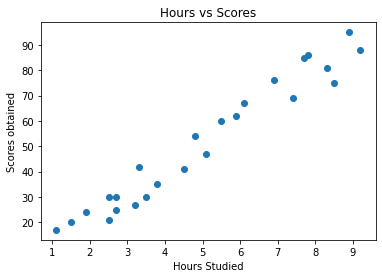

In [58]:
#Plotting the Scatter plot between Hours and Scores
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.title("Hours vs Scores")
plt.scatter(hours,scores)

**Preparing Data**

In [59]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [60]:
#Splitting Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


**LINEAR REGRESSION**

In [62]:
#Training the Model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

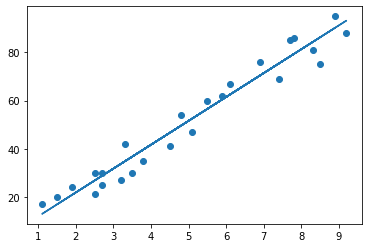

In [63]:
#Plotting Regression Line
line = linreg.coef_*X+linreg.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [64]:
#Prdecting Scores of Test data
Y_pred=linreg.predict(X_test)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [65]:
df=pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


**Predicted score if a student studies for 9.25 hrs/ day**

In [66]:
hours = [[9.25]]
own_pred=linreg.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating Model**

The Error Metrics of **Linear Regression** are:                                               
1)Mean Absolute Error                                                                 
2)Mean Squared Error                                                              
3)R2_Score

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MeanAbsoluteError: "+str(mean_absolute_error(Y_test,Y_pred)))
print("MeanSquaredError : "+str(mean_squared_error(Y_test,Y_pred)))
print("R2_Score         : "+str(r2_score(Y_test,Y_pred)))

MeanAbsoluteError: 4.183859899002982
MeanSquaredError : 21.598769307217456
R2_Score         : 0.9454906892105354


**STATS MODEL**

In [68]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [69]:
#Independent Attributes
ind_atr=list(set(data.columns)-set(['Scores']))
ind_atr

['Hours']

In [70]:
x='+'.join(ind_atr)
x

'Hours'

In [71]:
formula="~".join(('Scores',x))
print(formula)

Scores~Hours


In [72]:
import pandas.util.testing as tm
from statsmodels.formula.api import ols

In [73]:
lm_mod=ols(formula=formula,data=data)
result=lm_mod.fit()

In [74]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        05:19:06   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3